In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import re

import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
val = ["acdc","abc","3","fsa"]



def gramize(value):
    def flatten(li):
        fl = list()
        for item in [item2 for item2 in li]:
            for i in item:
                fl.append(i)
        return fl
    x = [[[value[y], value[x]] for x in range(y+1, len(value))] for y in range(len(value)-1)]
    return flatten(x)

def cleanse(value):
    res = list()
    for i in range(len(value)):
        v = value[i]
        if not "http://" in v:
            v = re.sub("[^A-z]","",v)
        if not v=='':
            res.append(v)
    return res
    
val = cleanse(val)
l = gramize(val)
l

[['acdc', 'abc'], ['acdc', 'fsa'], ['abc', 'fsa']]

In [3]:
f = open('C:/Users/D072202/Desktop/test.csv', "w+", encoding="UTF-8")
with open("C:/Users/D072202/DeepAnyMatch/DeepAnyMatch-master/data/sap_hilti_data/sap_hilti_full_strings/graph_triples_hilti_web.nt", "r", encoding="UTF-8") as f2:
    for line in f2:
        if "http://rdata2graph.sap.com/hilti_web/property/products.name" in line:
            line = line.split(" ")
            g = gramize(cleanse(line))
            for tup in g:
                f.write(tup[0] + "," + tup[1]+ "\n")
f.close()
print("done") 


done


In [5]:

x = pd.read_csv('C:/Users/D072202/DeepAnyMatch/DeepAnyMatch-master/result_data/test_2019_03_26_10_45_38_360067/w2v_formatted_training_material.csv', sep=',', header=None, encoding="UTF-8")
x = x.loc[x[1] != '<>']
#x = x.append(pd.DataFrame(np.append(np.array([[tmp] for tmp in list(set(x[0]))]), np.full((len(list(set(x[0]))), 1), "<>"), axis=1)))
#x = x[:2000]
x = x.dropna()
x.head(20)

,0,1
0,http://rdata2graph.sap.com/hilti_erp/einsteige...,einsteigerpaket
1,http://rdata2graph.sap.com/hilti_erp/einsteige...,ds-bh
2,http://rdata2graph.sap.com/hilti_erp/einsteige...,300/3.2/20
3,http://rdata2graph.sap.com/hilti_erp/einsteige...,c1
4,http://rdata2graph.sap.com/hilti_erp/hammer_dr...,hammer
5,http://rdata2graph.sap.com/hilti_erp/hammer_dr...,drill
6,http://rdata2graph.sap.com/hilti_erp/hammer_dr...,bit
7,http://rdata2graph.sap.com/hilti_erp/hammer_dr...,x
8,http://rdata2graph.sap.com/hilti_erp/hammer_dr...,22/92
9,http://rdata2graph.sap.com/hilti_erp/hammer_dr...,blk


In [8]:
t = x.groupby(0).agg(['count'])[1].sum()['count']

MAXOCCURENCE = 0.95*t
ctr = 0
sort = x.groupby(0).agg(['count'])[1].sort_values(by=['count'], ascending=True)
for ind, v in sort.iterrows():
    ctr = ctr + v['count']
    if ctr > MAXOCCURENCE:
        MAXCOUNT = v['count']
        break

MINOCCURENCE = 0.001*t
ctr = 0
sort = x.groupby(0).agg(['count'])[1].sort_values(by=['count'], ascending=False)
for ind, v in sort.iterrows():
    ctr = ctr + v['count']
    if ctr > MAXOCCURENCE:
        MINCOUNT = v['count']
        break
print("done")
print(str(MINCOUNT))
print(str(MAXCOUNT))

done
2
8


In [9]:
#MINCOUNT = 2
#MAXCOUNT=999999
y = x.groupby(0).agg(['count'])[1]>MINCOUNT
y = y.loc[y['count']==True]
z = x.groupby(0).agg(['count'])[1]>MAXCOUNT
z = z.loc[z['count']==True]
x = x.loc[x[0].isin(list(y.index) + list(z.index))]
x.head()

,0,1
0,http://rdata2graph.sap.com/hilti_erp/einsteige...,einsteigerpaket
1,http://rdata2graph.sap.com/hilti_erp/einsteige...,ds-bh
2,http://rdata2graph.sap.com/hilti_erp/einsteige...,300/3.2/20
3,http://rdata2graph.sap.com/hilti_erp/einsteige...,c1
4,http://rdata2graph.sap.com/hilti_erp/hammer_dr...,hammer


In [8]:
f = open('C:/Users/D072202/Desktop/triples.csv','r', encoding="UTF-8")
x = f.read()
raw_sentences = re.split("\n",x)
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    words = raw.split(" ")
    return words
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0 and '<web/property/productsname>' in raw_sentence:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [10]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stem(sents):
    new_sents = list()
    for sent in sents:
        tmp = list()
        for word in sent:
            if not '<web' in word:
                word = ps.stem(re.sub('[^A-z0-9]','', word))
            if not 'productsname' in word:
                tmp.append(word)
        new_sents.append(tmp)
    return new_sents



In [12]:
documents = list()
for index, row in x.iterrows():
    documents.append([str(row[0])] + [str(row[1])])
if True ==True:
    documents = stem(documents)
    import gensim.models.word2vec as w2v
    import multiprocessing
    #ONCE we have vectors
    #step 3 - build model
    #3 main tasks that vectors help with
    #DISTANCE, SIMILARITY, RANKING

    # Dimensionality of the resulting word vectors.
    #more dimensions, more computationally expensive to train
    #but also more accurate
    #more dimensions = more generalized
    num_features = 2
    # Minimum word count threshold.
    min_word_count = 2

    # Number of threads to run in parallel.
    #more workers, faster we train
    num_workers = multiprocessing.cpu_count()

    # Context window length.
    context_size = 7

    # Downsample setting for frequent words.
    #0 - 1e-5 is good for this
    downsampling = 1e-3

    # Seed for the RNG, to make the results reproducible.
    #random number generator
    #deterministic, good for debugging
    seed = 1
    model = w2v.Word2Vec(
        sg=1,
        seed=seed,
        workers=num_workers,
        size=num_features,
        min_count=min_word_count,
        window=context_size,
        sample=downsampling,
        batch_words=6, ns_exponent=0.75
    )
    print("done")

done


In [13]:
model.build_vocab(documents)

In [14]:
model.train(documents, total_examples=model.corpus_count, epochs=1000, start_alpha=0.5, end_alpha=0.01)

(31973011, 35938000)

In [138]:
documents = list()
for index, row in x.iterrows():
    documents.append([str(row[0])] + [str(row[1])])

model = Word2Vec(documents, sg=0, size=2, min_count=2, iter=200)#, negative=20, sample=1e-3)
#documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(documents)]
#model = Doc2Vec(documents, vector_size=2, window=1, min_count=1, workers=4, epochs=8)
print("Done")

Done


In [1]:
vecs = list()
ids = list()
for d in model.wv.vocab:
    if "web" in d:
        try:
            vecs = vecs + [model.wv[d]] #[model.infer_vector(x[1].loc[x[0]==str(d)].astype(str).values.tolist())]
            ids = ids + [[d]]
        except:
            pass
vecs = np.array(vecs)
ids = np.array(ids)
print("Done")

NameError: name 'model' is not defined

In [2]:
vecs = np.array(model.wv[set(x[0])])
ids = np.array(list(set(x[0])))
vecs[:5]

NameError: name 'np' is not defined

In [16]:
minimize_strings = lambda i: i.replace("http://rdata2graph.sap.com/hilti_","").split("#")[0]
minimize_strings = np.vectorize(minimize_strings)
ids = minimize_strings(ids)
ids[:5]

array([['httprdata2graphsapcomhilti_webkwik_bolt_tz_carbon_steeld5dc4c2a6b374ec784e1284753667cff'],
       ['httprdata2graphsapcomhilti_webfirestop_system_adhesive_labelsbf5efd4c5ef84831a2bf16ae588cebc7'],
       ['httprdata2graphsapcomhilti_webtorx_screw_m6x16__repair_part_95aaa6d80aa84fce8718c34afbcd763c'],
       ['httprdata2graphsapcomhilti_webremote_control_ds_rc_ts20a97e0aaded054238803821e02441e818'],
       ['httprdata2graphsapcomhilti_webradio_module_poa_1168f435e05b550487db9eca7d111db36b1']],
      dtype='<U121')

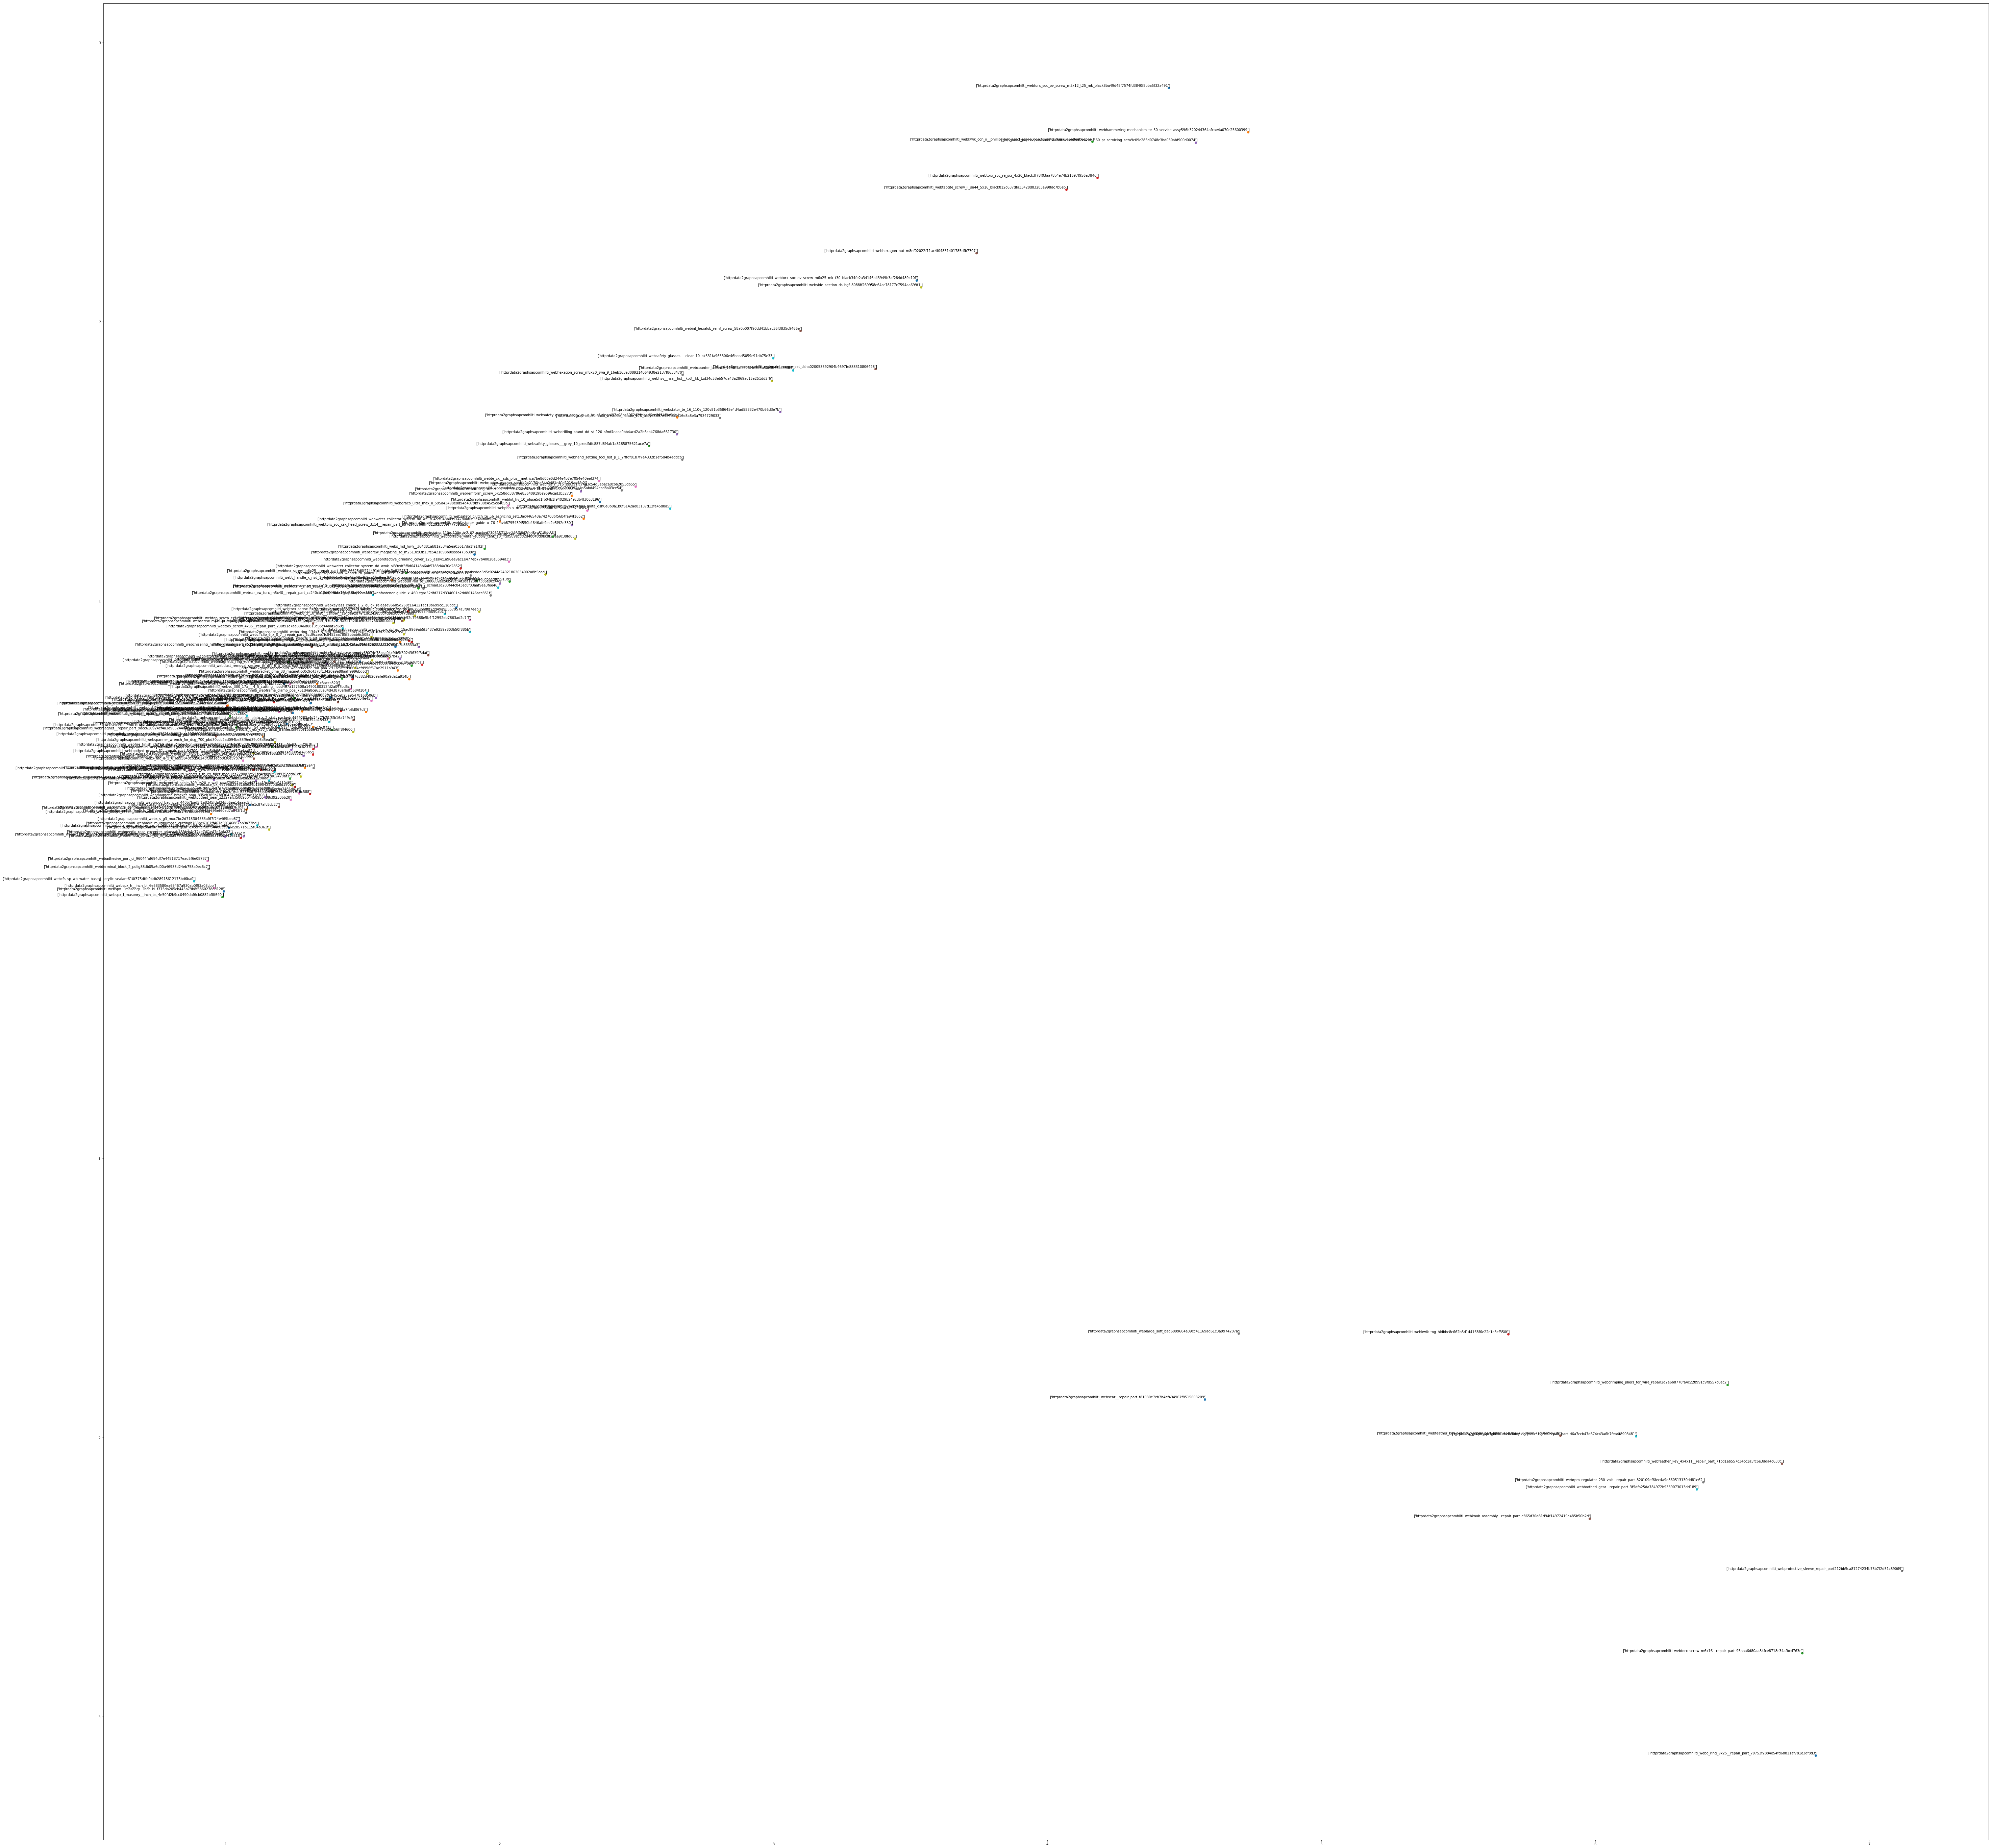

Done


In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
for i, label in enumerate(ids[:200]):
        x, y = vecs[i,0], vecs[i,1]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
plt.savefig("C:/Users/D072202/Desktop/test.png")
plt.show()
print("Done")

In [12]:
model.wv["<>"]

KeyError: "word '<>' not in vocabulary"

In [59]:
model.wv.most_similar('<web/diamond_core_bits>')

[('<web/accessories_for_impact_drivers___wrenches>', 1.0),
 ('<web/water_management_system>', 0.9999995231628418),
 ('collar', 0.9999995231628418),
 ('<web/accessories_for_threaded_studs>', 0.9999991059303284),
 ('<web/spx_masonry>', 0.9999988079071045),
 ('plastic', 0.9999987483024597),
 ('expansion', 0.9999985694885254),
 ('saddle', 0.9999975562095642),
 ('<web/cpc_____framing>', 0.9999974370002747),
 ('tuck', 0.9999971389770508)]

In [112]:
ids

array([['<web/property/productsname>'],
       ['<web/toothed_gear_z_46>'],
       ['<web/hs>'],
       ['<web/partition_wall__repair_part_>']], dtype='<U34')